In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df1=pd.read_csv("df1_Ausbl.csv")
df3=pd.read_csv("df3_Schulab.csv")
df8i=pd.read_csv("df8i_Mig.csv")
df8m=pd.read_csv("df8m_Mig.csv")
df8w=pd.read_csv("df8w_Mig.csv")
df9i=pd.read_csv("df9i_Mig.csv")
df9m=pd.read_csv("df9m_Mig.csv")
df9w=pd.read_csv("df9w_Mig.csv")
dfH=pd.read_csv("dfH_Habl.csv")

In [50]:
def filter_2D(column_name, key, table): 
    return table[table[column_name].str.contains(key)]

In [51]:

# Für df1 mit Nationalität und Geschlecht
def plot_func1(column_name, key, table):
    df = filter_2D(column_name, key, table)
    
    ausbe = df["Ausbildungsbereich"].unique()
    fig, ax = plt.subplots()
    for ausb in ausbe:
        ausb_df = df[df["Ausbildungsbereich"] == ausb]
        ax.barh(ausb, ausb_df["percentage"])
    ax.set_xlabel("percentage per distribution")
    ax.set_title(key)
    ax.set_yticklabels(ausbe)
    plt.show

#Für df3 mit Schulabschluss als subplot männlich und weiblich
def plot_func3_2(column_name, key, table):
    df = filter_2D(column_name, key, table)
    
    ausbe = df["Schulart"].unique()
    fig, ax = plt.subplots(2,1, sharex=True)
    for ausb in ausbe:
        ausb_df = df[df["Schulart"] == ausb]
        ax[0].bar(ausb, ausb_df["männlich percentage"])
        ax[1].bar(ausb, ausb_df["weiblich percentage"])
    
    ax[0].set_ylabel("männlich %")
    ax[1].set_ylabel("weiblich %")
    plt.xticks(ausbe, rotation=90)
    plt.show

#Für df3 mit Schulabschluss und männlich oder weiblich als key_value
def plot_func3(column_name_Schulab, key, table, key_value):
    df = filter_2D(column_name_Schulab, key, table)
    
    ausbe = df["Schulart"].unique()
    fig, ax = plt.subplots()
    for ausb in ausbe:
        ausb_df = df[df["Schulart"] == ausb]
        # key_value:"männlich percentage" oder "weiblich percentage"
        ax.barh(ausb, ausb_df[key_value])
    ax.set_title(key_value)
    ax.set_xlabel("percentage")
    ax.set_yticklabels(ausbe)
    
    plt.show

# Für dfH mit Nationalität und Geschlecht
def plot_funcH(column_name_Geschlecht, key, table):
    df = filter_2D(column_name_Geschlecht, key, table)
    
    ausbe = df["Fächergruppe"].unique()
    fig, ax = plt.subplots()
    for ausb in ausbe:
        ausb_df = df[df["Fächergruppe"] == ausb]
        ax.barh(ausb, ausb_df["percentage"])
    ax.set_xlabel("percentage per distribution")
    ax.set_title(key)
    ax.set_yticklabels(ausbe)
    plt.show


# Für df8,df9 mit {i,m,w}                
def plot_func_all(table):
    table.plot(x="Detaillierter Migrationshintergrund", y=['Prozentual (ohne Migrationshintergrund)', 'Prozentual (mit Migrationshintergrund)'], kind="bar",figsize=(9,8))
    plt.show()

# nicht sehr schön ausarbeitet
def plot_func_select(column_name, key, table):
    df= filter_2D(column_name, key, table)
    df.plot(x="Detaillierter Migrationshintergrund", y=['Prozentual (ohne Migrationshintergrund)', 'Prozentual (mit Migrationshintergrund)'], kind="bar",title=key, figsize=(9,8))
    plt.show()

In [36]:
class Question:
     def __init__(self, prompt, answer):
          self.prompt = prompt
          self.answer = answer

question_prompts = [
     "Dein Geschlecht?\n(a) männlich\n(b)weiblich",
     "Dein Migrationshintergrund?\n(a) ohne Migrationshintergrund\n(b) mit Migrationshintergrund",
     "Welchen Schulabschluss strebst du an?\n(a) Hauptschule\n(b) Realschule\n(c) Fachhochschulreife\n(d) Abitur",
     "Welchen berufsqualifizierenden Abschluss strebst du an?\n(a) nicht-akademischer Abschluss\n(b) Bachelor\n(c) Master\n(d), Diplom/Magister7Staatsexamen\n(e) Promotion",
     "Welchen Schulabschluss haben deine Eltern (der höchste Abschluss)?\n(a) Ohne Abschluss\n(b) Hauptschulabschluss\n(c) Mittlerer Schulabschluss\n(d) Fachhochschulreife\n(e) Allgemeine Hochschulreife",
     

]

questions = [
     Question(question_prompts[0], "a"),
     Question(question_prompts[1], "a"),
     Question(question_prompts[2], "a"),
     Question(question_prompts[3], "a"),
     Question(question_prompts[4], "a")
     
]

def run_quiz(questions):
     score = 0
     for question in questions:
          answer = input(question.prompt)
          if answer == question.answer:
               score += 1
     print("you got", score, "out of", len(questions))
    
    

run_quiz(questions)

Dein Geschlecht?
(a) männlich
(b)weiblicha
Dein Migrationshintergrund?
(a) ohne Migrationshintergrund
(b) mit Migrationshintergrunda
Welchen Schulabschluss strebst du an?
(a) Hauptschule
(b) Realschule
(c) Fachhochschulreife
(d) Abitura
Welchen berufsqualifizierenden Abschluss strebst du an?
(a) nicht-akademischer Abschluss
(b) Bachelor
(c) Master
(d), Diplom/Magister7Staatsexamen
(e) Promotiona
Welchen Schulabschluss haben deine Eltern (der höchste Abschluss)?
(a) Ohne Abschluss
(b) Hauptschulabschluss
(c) Mittlerer Schulabschluss
(d) Fachhochschulreife
(e) Allgemeine Hochschulreifea
you got 5 out of 5


In [75]:

#differenzierung männlich weiblich und Connection zu Arnes Teil
def run_quiz1(questions):
    for question in questions:
        answer = input(question.prompt[1])
        if answer == question.answer:
            plot_func1("Nationalität", "Deutsche", df1)
            
run_quiz1(questions)

KeyboardInterrupt: Interrupted by user

<ipython-input-51-93d491ee9fdb>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ausbe)


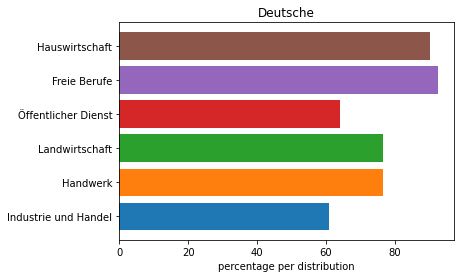

In [55]:
#plot_func1("Nationalität", "Deutsche", df1) -> Schulabschluss nach Nationalität oder Geschlecht

#plot_func3_2("Schulabschluss", "Hauptschulabschluss", df3) -> Schulabschluss nach Schulabschluss der Eltern

#plot_func3("Schulabschluss", "Hauptschulabschluss", df3, "weiblich percentage") -> Schulabschluss nach Abschluss der Eltern und Geschlecht

#plot_funcH("Nationalität", "Deutsche", dfH) -> Habilitationen nach Nationalität oder Geschlecht

#plot_func_all(df8w) -> 

#

In [ ]:
#nicht beachten, das ist der Notfallplan lmao


#männlich, ohne Migrationshintergrund, Hauptschule, nicht-akademischer Abschluss, ohne Abschluss
questions_männlich_ohneMH_Hauptschule_nichtakademisch_ohneAbschluss = [
     Question(question_prompts[0], "a"),
     Question(question_prompts[1], "a"),
     Question(question_prompts[2], "a"),
     Question(question_prompts[3], "a"),
     Question(question_prompts[4], "a")
    
]

#männlich, ohne Migrationshintergrund, Hauptschule, nicht-akademischer Abschluss, ohne Abschluss
questions1_männlich_mitMH_Hauptschule_nichtakademisch_ohneAbschluss = [
     Question(question_prompts[0], "a"),
     Question(question_prompts[1], "b"),
     Question(question_prompts[2], "a"),
     Question(question_prompts[3], "a"),
     Question(question_prompts[4], "a")
    
]

#männlich, ohne Migrationshintergrund, Hauptschule, nicht-akademischer Abschluss, ohne Abschluss
questions1_männlich_mitMH_Hauptschule_nichtakademisch_ohneAbschluss = [
     Question(question_prompts[0], "a"),
     Question(question_prompts[1], "b"),
     Question(question_prompts[2], "a"),
     Question(question_prompts[3], "a"),
     Question(question_prompts[4], "a")
    
]

In [ ]:
#differenzierung männlich weiblich und Connection zu Arnes Teil
def run_quiz1(questions):
    for question in questions:
        answer = input(question.prompt)
        if answer == question.answer[0]:
            plot_func1("Nationalität", "Deutsche", df1)
            
run_quiz1(questions)